# Histogram of Oriented Gradients

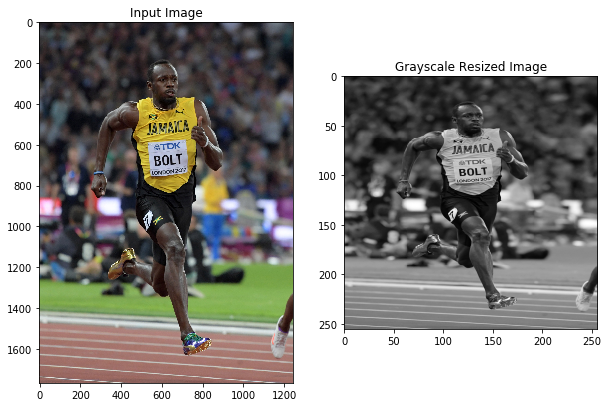

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


image = cv2.imread('images/bolt-running.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# convert to grayscale to use image intensities
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = cv2.resize(gray, (256,256), interpolation = cv2.INTER_AREA)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.set_title('Input Image')
ax1.imshow(image_copy)
ax2.set_title('Grayscale Resized Image')
ax2.imshow(gray, cmap='gray')

## Gradient Magnitude and Direction

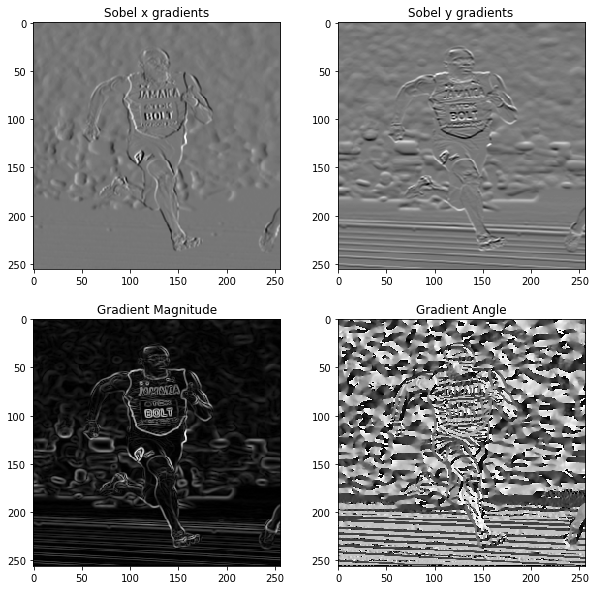

In [76]:
gx = cv2.Sobel(gray, cv2.CV_32F, dx=1, dy=0, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_32F, dx=0, dy=1, ksize=3)


magnitude, angles = cv2.cartToPolar(gx, gy)

f, axes = plt.subplots(2, 2,figsize=(10,10))
axes[0, 0].set_title('Sobel x gradients')
axes[0, 0].imshow(gx, cmap='gray')
axes[0, 1].set_title('Sobel y gradients')
axes[0, 1].imshow(gy, cmap='gray')


axes[1, 0].set_title('Gradient Magnitude')
axes[1, 0].imshow(magnitude, cmap='gray')
axes[1, 1].set_title('Gradient Angle')
axes[1, 1].imshow(angles, cmap='gray')

## Define Cells and Bins

In [79]:
n_bins = 16 # bins/channels in histogram
n_blocks = 4 # number of sub-squares for block normalization must be power of 2 to split image evenly

def block_array(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

# quantize angle values into one of (0...n_bins)
bins = np.int32(n_bins*angles/(2*np.pi))

# Divide into n_blocks sub-squares
block_size = int(gray.shape[0]/(n_blocks/2))
bin_cells = block_array(bins, block_size, block_size)
mag_cells = block_array(magnitude, block_size, block_size)

print('Number of bins:', n_bins)
print('Number of blocks:', n_blocks)
print('Input Image shape:', gray.shape)
print('Bins/Cells shape:', bin_cells.shape)

Number of bins: 16
Number of blocks: 4
Input Image shape: (256, 256)
Bins/Cells shape: (4, 128, 128)


## Calculate Block Histograms Weighted by Direction

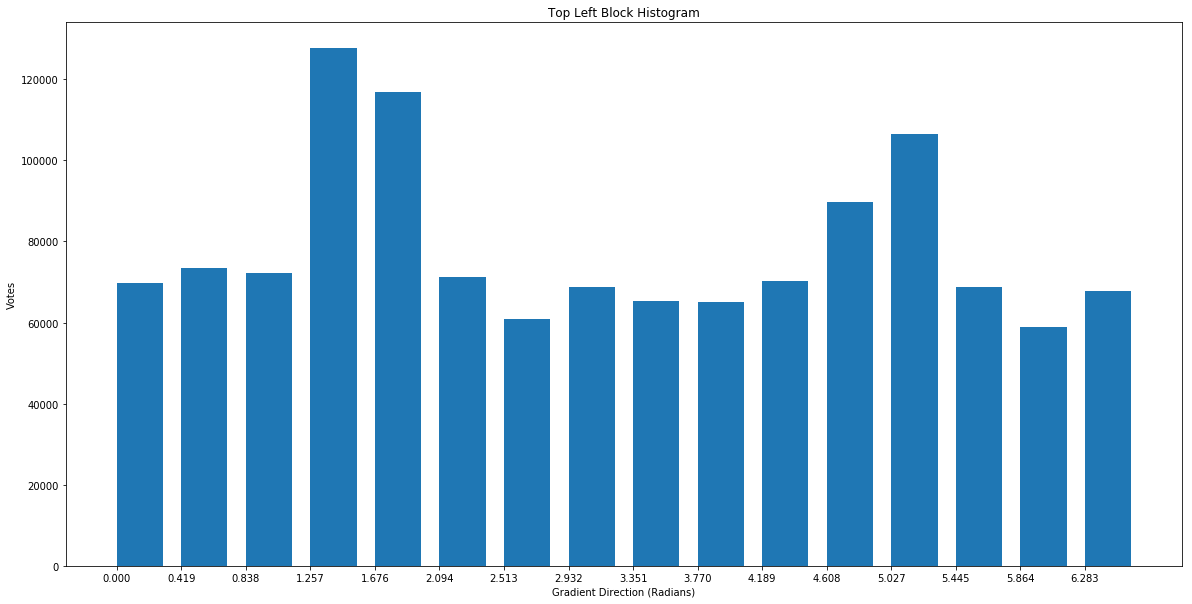

In [134]:
hists = [np.bincount(b.ravel(), m.ravel(), n_bins) for b, m in zip(bin_cells, mag_cells)]

# visualize the top left block histogram
bin_ranges = np.linspace(0, 2*np.pi, n_bins)
plt.figure(figsize=(20,10))
plt.bar(bin_ranges, height=hists[0], align='edge', width=0.3)
plt.xticks(bin_ranges);
plt.title('Top Left Block Histogram')
plt.xlabel('Gradient Direction (Radians)')
plt.ylabel('Votes')

## Concatenate Block Histograms into Feature Vector

In [135]:
# concatenate block histogram vectors
# hist is a n_bins*n_blocks bit vector
hist = np.hstack(hists)
print(hist.shape)

(64,)
